In [98]:
from commonfunctions import *

# Input Processing

Model Answer

In [99]:
model_answer = {}

with open('model-answer-sample.txt', 'r') as file:
    for line_number, line in enumerate(file, start=1):
        model_answer[line_number] = line.strip()

print(model_answer)

{1: 'A', 2: 'B', 3: 'A', 4: 'C', 5: 'D', 6: 'E', 7: 'C', 8: 'C', 9: 'D', 10: 'A', 11: 'E', 12: 'D', 13: 'E', 14: 'A', 15: 'C', 16: 'A', 17: 'E', 18: 'A', 19: 'B', 20: 'B', 21: 'B', 22: 'C', 23: 'D', 24: 'A', 25: 'B', 26: 'C', 27: 'A', 28: 'B', 29: 'C', 30: 'D', 31: 'E', 32: 'B', 33: 'E', 34: 'D', 35: 'A', 36: 'C', 37: 'E', 38: 'D', 39: 'C', 40: 'B', 41: 'A', 42: 'A', 43: 'B', 44: 'C', 45: 'D', 46: 'E', 47: 'D', 48: 'D', 49: 'D', 50: 'A'}


Bubble Sheet: Preprocessing

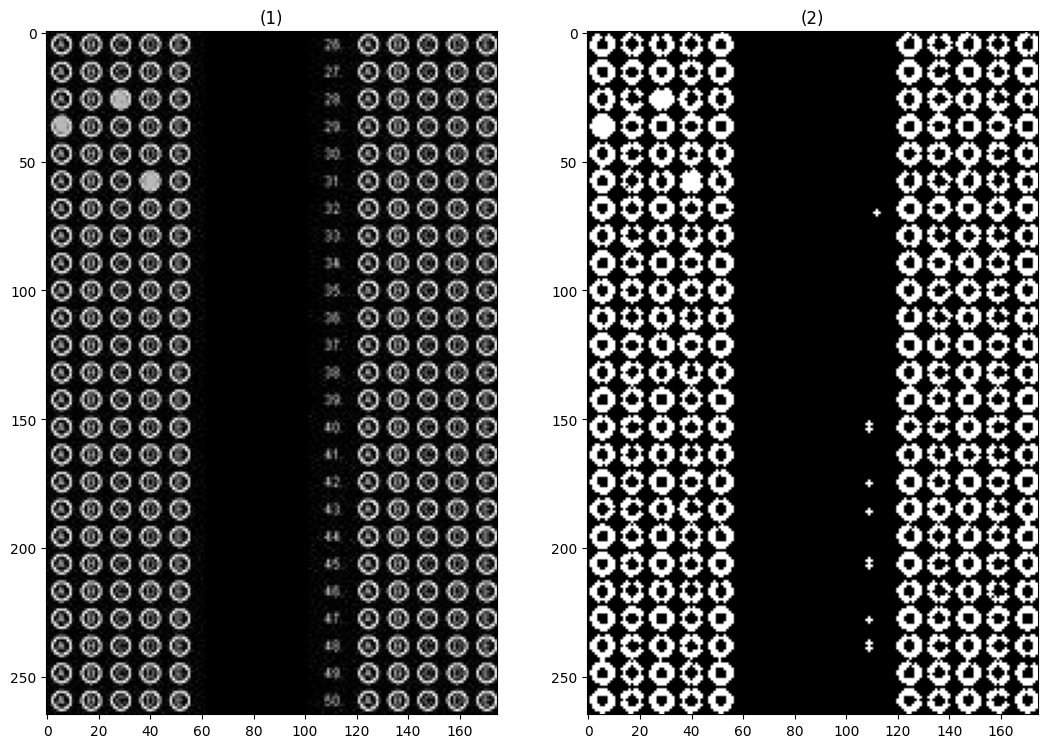

In [103]:
from skimage.measure import regionprops
from skimage.draw import circle_perimeter

image_path = 'bubble-sheet-perfect-sample-shaded.jpg'
bubble_sheet = io.imread(image_path)
if len(bubble_sheet.shape) == 3:
    bubble_sheet = rgb2gray(bubble_sheet)
bubbles = bubble_sheet[45:310, 50:225]
inverted_image = invert(bubbles)
binary_image = inverted_image > 0.7
se = disk(1)
dilated_image = dilation(binary_image, se)
show_images([inverted_image, dilated_image])

Filling Detection

Circle at (25, 28)
Circle at (36, 5)


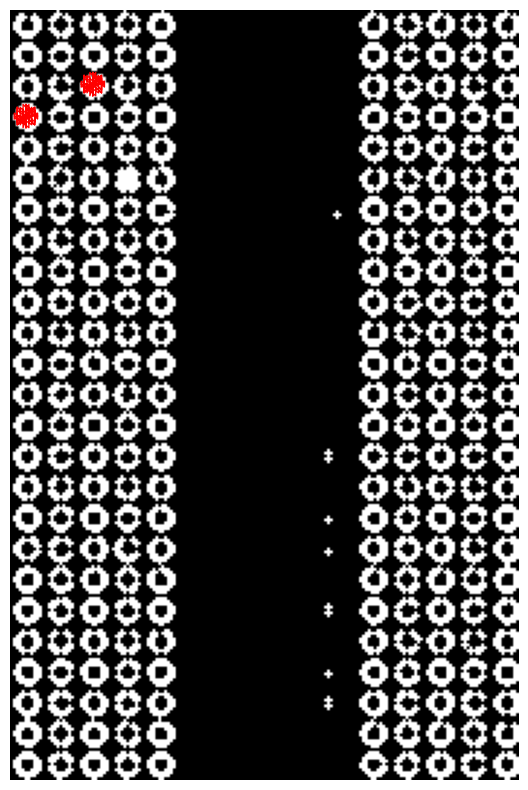

In [119]:
labeled_image, num_labels = label(dilated_image, connectivity=2, return_num=True)
regions = regionprops(labeled_image)

solid_circles = []
for region in regions:
    # Check if the region is sufficiently large and round
    area = region.area
    perimeter = region.perimeter
    roundness = (perimeter ** 2) / (4 * np.pi * area)
    
    if area > 50 and roundness < 1.2:  # Check for roundness
        solid_circles.append(region)

# show_images([dilated_image, labeled_image])

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dilated_image, cmap='gray')
ax.axis('off')

# Draw the detected solid circles
for circle in solid_circles:
    # Draw the circle boundary
    minr, minc, maxr, maxc = circle.bbox
    center_y, center_x = circle.centroid
    radius = np.sqrt(circle.area / np.pi)
    circ_y, circ_x = circle_perimeter(int(center_y), int(center_x), int(radius))
    circ_y = np.clip(circ_y, 0, dilated_image.shape[0] - 1)
    circ_x = np.clip(circ_x, 0, dilated_image.shape[1] - 1)
    ax.plot(circ_x, circ_y, color='red', linewidth=1)
    # Print status for each detected circle
    print(f"Circle at ({int(center_y)}, {int(center_x)})")

plt.show()